# FLOW 🔖

We’ll be using Machine Learning to predict whether a Pima Indian Women has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

This notebook walks through the various stages of the data science workflow. In particular, the notebook has the following sections:


* [Introduction to Supervised Machine Learning
* Let's start to understand the Problem and Dataset
* Exploratory Data Analysis (EDA) and Statistical Analysis
* Prediction
* Model Performance Analysis
* Publish and deploy the model


## Introduction to supervised Machine Learning

## What is machine learning?
Task **T**: image classification problem of classifying dogs and cats

Experience **E**: I would give a ML algorithm a bunch of images of dogs and cats

The performance measure **P**: the ML algorithm could learn how to distinguish a new image as being either a dog or cat.

Machine learning (Machine Learning by Tom Mitchell):

*A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, Improves with experience E.*

## Types of Machine learning Algorithms
* Supervised Learning: Input data is called training data and has a known label or result. Ex: Spam/not-spam or a stock price at a time.

* Unsupervised Learning: Input data is not labeled and does not have a known result. EX: Grouping customers by purchasing behavior

* Semi-Supervised Learning: Input data is a mixture of labeled and unlabeled examples. EX: a photo archive where only some of the images are labeled, (e.g. dog, cat, person) and the majority are unlabeled.

* Reinforcement Learning: a goal-oriented learning based on interaction with environment. Autonomous cars.

---


## Classification vs Regression
**Classification** predicting a **label** vs. **Regression** predicting a **quantity**.


## Classification Algorithms Examples:


### Binary Classification

> Binary classification refers to those classification tasks that have two class labels.

-  Popular Algorithms: 
    * Logistic Regression
    * k-Nearest Neighbors
    * Decision Trees
    * Support Vector Machine
    * Naive Bayes

- Examples : 
    * Email spam detection (spam or not).
    * Churn prediction (churn or not).
    * Conversion prediction (buy or not).



---

### Multi-Class Classification

> Multi-class classification refers to those classification tasks that have more than two class labels.

-  Popular Algorithms: 
    * k-Nearest Neighbors
    * Decision Trees
    * Naive Bayes
    * Random Forest
    * Gradient Boosting

- Examples :

    * Face classification.
    * Plant species classification.
    * Optical character recognition.

*Many algorithms used for binary classification can be used for multi-class classification.*


---

### Multi-Label Classification

> Multi-label classification refers to those classification tasks that have two or more class labels, where one or more class labels may be predicted for each example.

- Popular Algorithms:
    * Multi-label Decision Trees
    * Multi-label Random Forests
    * Multi-label Gradient Boosting

- Examples:
    * Consider the example of photo classification, where a given photo may have multiple objects in the scene and a model may predict the presence of multiple known objects in the photo, such as “bicycle,” “apple,” “person,” etc.
--- 

###  Imbalanced Classification

> Imbalanced classification refers to classification tasks where the number of examples in each class is unequally distributed.

- Popular Algorithms:
    *  Cost-sensitive Logistic Regression
    *  Cost-sensitive Decision Trees
    *  Cost-sensitive Support Vector Machines.

- Examples include:

    * Fraud detection.
    * Outlier detection.
    * Medical diagnostic tests.

---

### Classification Metrics

* Accuracy 
* Logarithmic Loss
* ROC, AUC
* Confusion Matrix
* Classification Report

---

🔎 *Source : https://machinelearningmastery.com/types-of-classification-in-machine-learning/*

# Let's start to understand the Problem and Dataset
Actually it was a question for many scientists why so many Pima Indian Women suffer from diabetes in relation to other ethnicities.

The study was carried out by scientists to investigate the significance of health-related predictors of diabetes in Pima Indians Women. The study population was the females 21 years and above of Pima Indian heritage patients of diabetes and digestive and kidney diseases. 🧬

The research question was: what are the health predictions that associated with the presence of diabetes in Pima Indians?

The study aimed at testing the significance of health-related predictors of diabetes in Pima Indians women. That was according to World Health Organization criteria (i.e. if the 2-hour post-load plasma glucose was at least 200 mg/dl at any survey examination or if found during routine medical care). A total of 768 women were registered in the database. 📝

So, here we have to find out why so many Pima Indian Women suffer from diabetes in relation to other ethnicities? 💉

To find the reason behind this, we have to find whether there is a relationship between the numbers of times a women was pregnant and the BMIs of Pima Indian Women older than 21 years old, or whether the women have diabetes and their diabetes pedigree function (a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history). 🔬

So lets start the analysis, but before that, I think we should understand our dataset and good to have basic knowledge of diabetes also.

## What is Diabetes? 🩸💉
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells. 

## What is Gestational Diabetes?¶
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes. Gestational diabetes causes high blood sugar that can affect the pregnancy and the baby’s health.

Results indicate that the highest prevalence of diabetes is found in high rates in Indian Pima.

So, lets start and try to find out why Pima Indians Women have higher rate of diabetes.



## Define Problem

### Pima Indians Diabetes Database

#### Predict the onset of diabetes based on diagnostic measures
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    Attribute Information:
        💊    Pregnancies: Number of times pregnant
        💊    Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
        💊    BloodPressure: Diastolic blood pressure (mm Hg). 120/80 is normal BP level for female above 18 yr old.
        💊    SkinThickness: Triceps skin fold thickness (mm)
        💊    Insulin: 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
        💊    BMI: Body mass index (weight in kg/(height in m)2)
        💊    DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
        💊    Age: Age (years)
        💊    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)



# Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [ ]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing, metrics and modeling
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (precision_score, recall_score, 
                                            confusion_matrix,  roc_curve, precision_recall_curve, 
                                            accuracy_score, roc_auc_score, f1_score)


import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Webinars/Diabetes - ML /diabetes.csv')

## Analyze Data:
* Descriptive Statistics

In [ ]:
# View top 5 rows of our dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#  Check the number of rows and columns in the dataset
df.shape

(768, 9)

Dataset comprises of 768 observations and 9 fields. As observed above we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

In [ ]:
## Lets check data types,columns names, null value counts, memory usage etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# basic statistic details about the data 
# (note only numerical columns would be displayed here unless parameter include="all")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The above dataframe describes all key information in the dataset. I have made a few google searches to gain some domain knowledge. This is mainly to identify any outlier or inconsistent values in the dataset. As per the secondary research, Skin Thickness COlumn has outliers since max values are seen as 99 while average values among Indian women ranges from 18-22 for tricep area.

Below are the counts of 0 values for Glucose, BP and BMI. As seen, Glucose and BMI has 5 and 11 0 values resp. and apart from these values, the distributions in the graphs are gaussian. We can later correct these 0 values to have normal distributions for both. Blood Pressure has 35 0 values and I will not adjust these 0 values. italicized text

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

### Can minimum value of below listed columns be zero (0)?
On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

**It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values.**


In [ ]:
df_copy = df.copy(deep=True)

df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose',
                                                                                           'BloodPressure',
                                                                                           'SkinThickness',
                                                                                           'Insulin','BMI']].replace(0,np.NaN)

# showing the count of Nans
print(df_copy.isnull().sum())
# pd.DataFrame(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 👍🏼 All missing values are encoded with NaN value

### Let's take look at our data in the most raw shape and manipulated shape

### To fill these Nan values the data distribution needs to be understood

#### Pair Plot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

The below pairplots shows how the outcomes have varied based on different features. 

### Scatter Matrix of Data

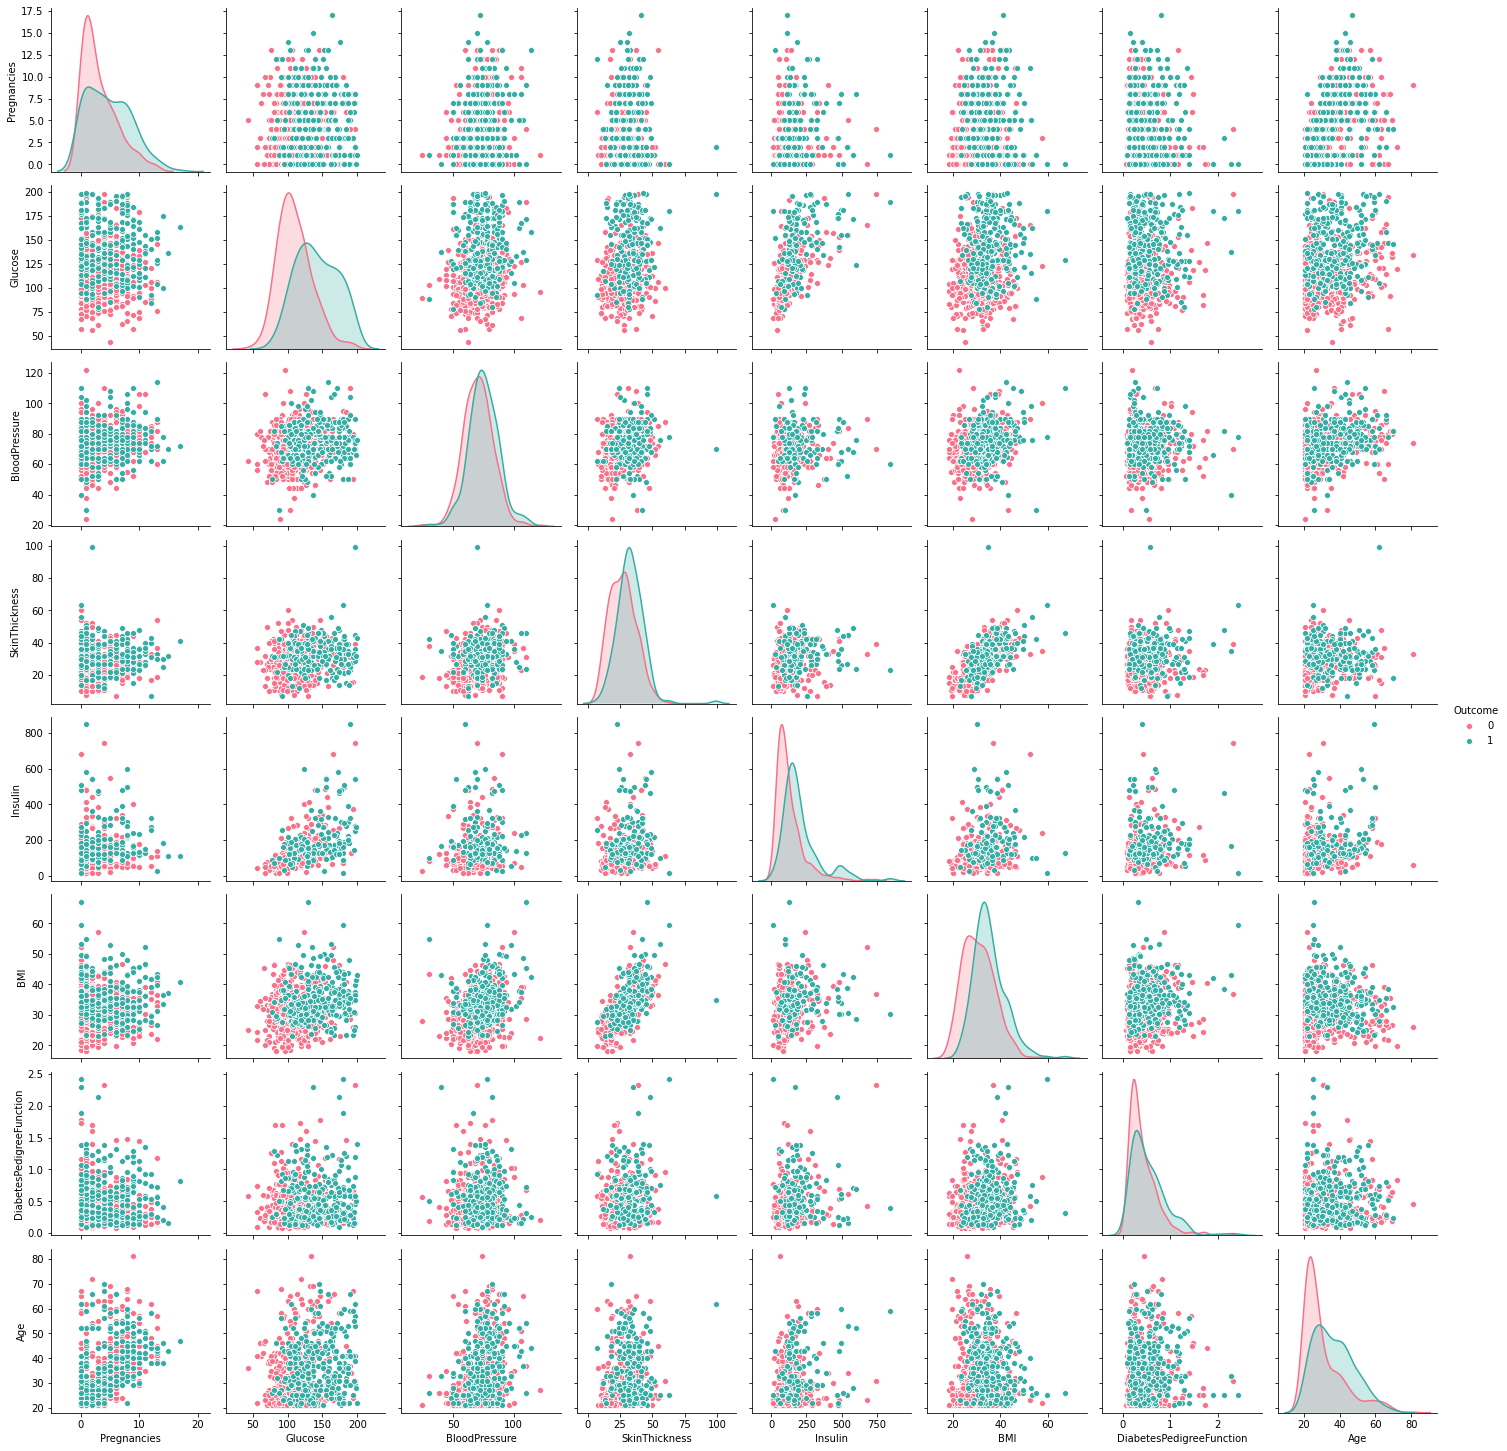

In [ ]:
sns.pairplot(df_copy, hue="Outcome", palette="husl")

### Pair of Uncleaned Data

The pairs plot / Scatter Matrix builds on two basic figures, the **histogram** and the** scatter plot**. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

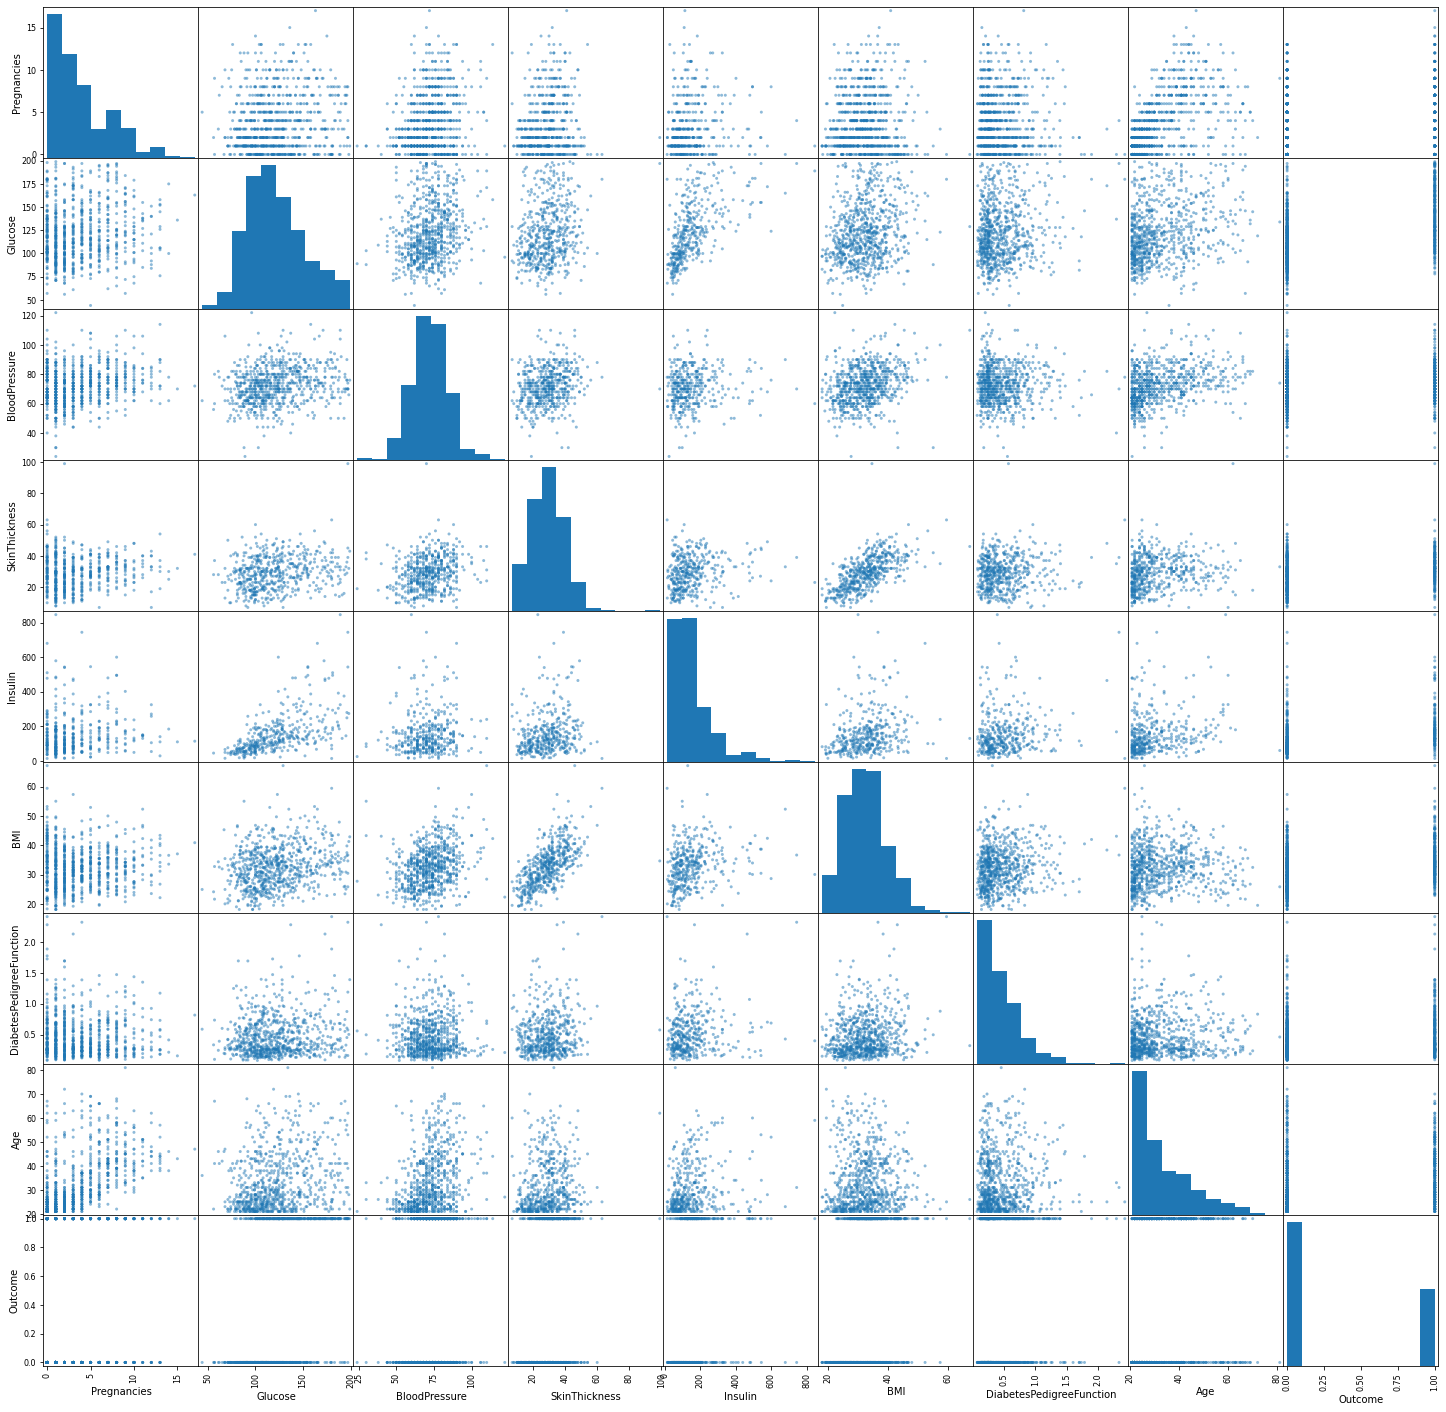

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(df_copy, figsize=(25,25))

## Correlation Matrix [Correlation between features]
Correlation matrix shows Glucose, BMI and Pregnency to be highly correlated with the outcome.We will also visualize the same using a heatmap.

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

### Heatmap for Uncleaned Data

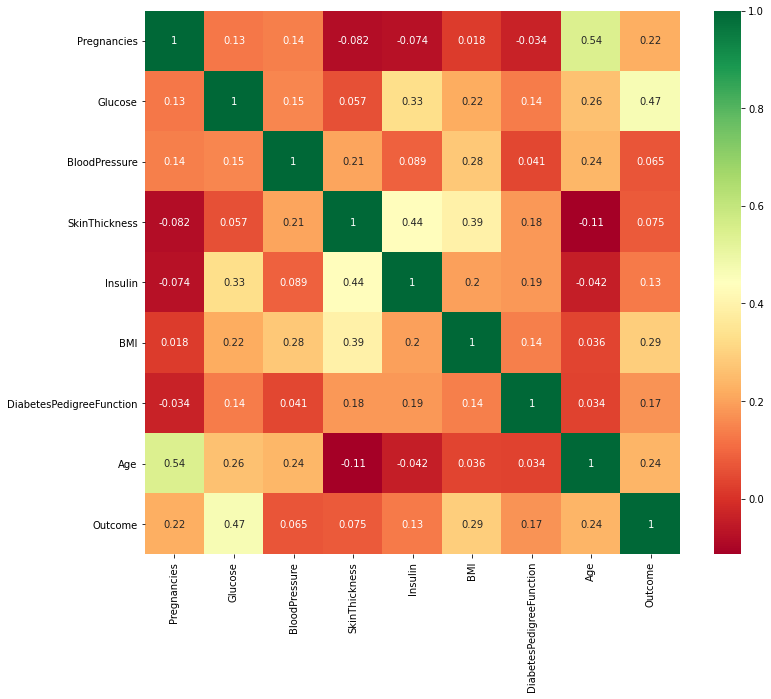

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Highlights
The correlation heatmap shows 4 main correlated features to *Outcome*, **Age**, **BMI**, **Glucose**, **Pregnancies**. However, Pregnancy and Age are highly correlated and will result in co-linearity.

Since no particular feature shows a high correlation, I will not perform feature selection and will continue with the existing features to run prediction models.


### Histogram Plot

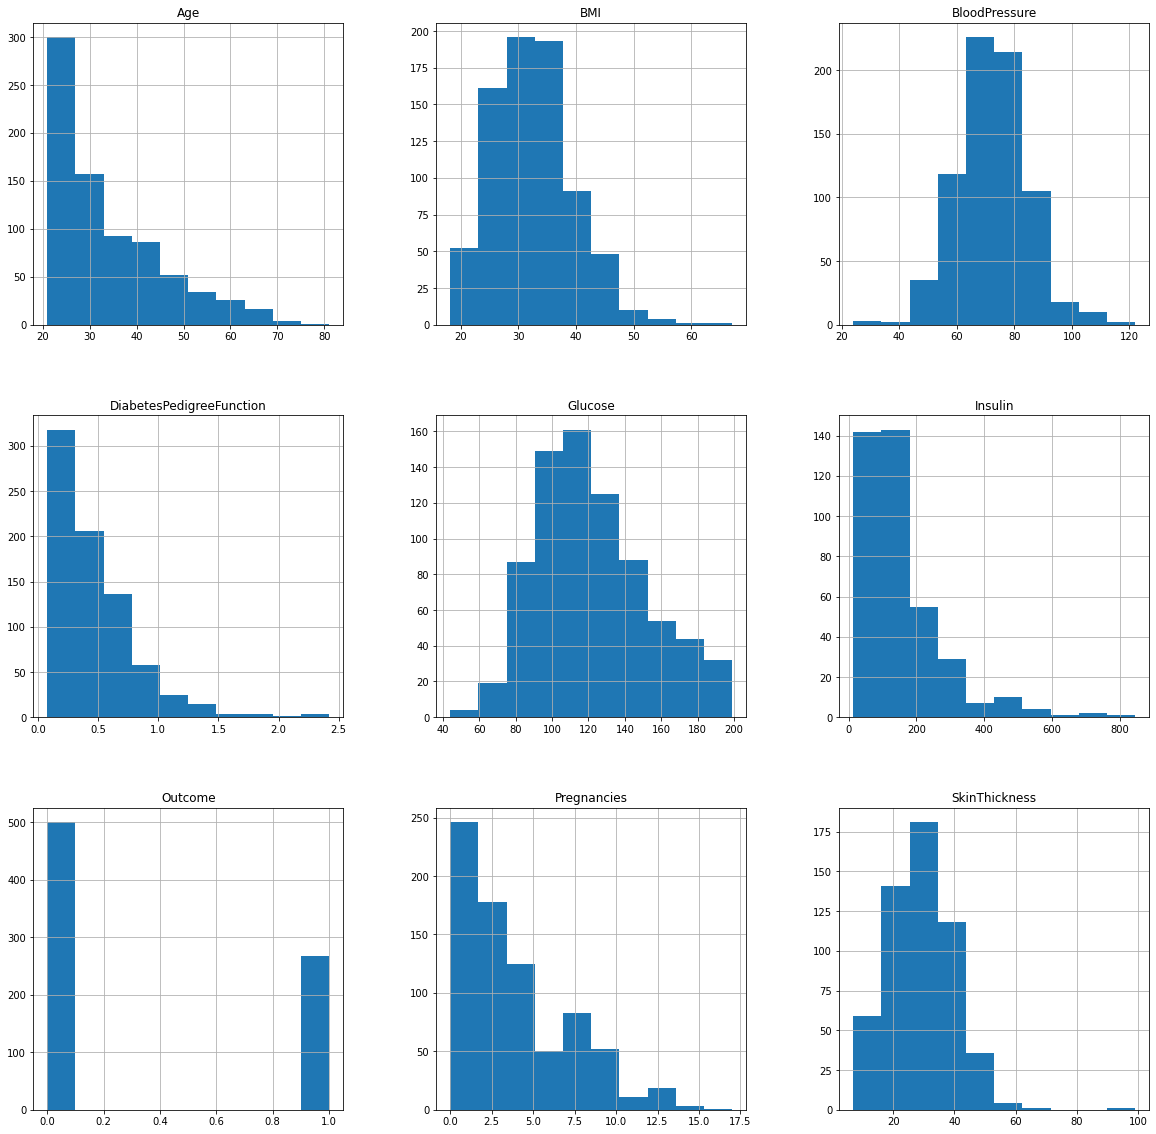

In [ ]:
# df_copy has no 0 values, has NaN values
df_copy.hist(figsize=(20,20));

Let's investigate each fearure distribution for each out come

A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

### Aiming to impute NaN values for the columns in accordance with their distribution

### Highlights

* Distribution graph show that glucose & BloodPressure columns are almost normally distributed where as SkinThickness, Insulin and BMI are positive skewned.
* So we will replace the missing values according to their distribution.

[![](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/)

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

### Histogram for cleaned data After NaN removal 

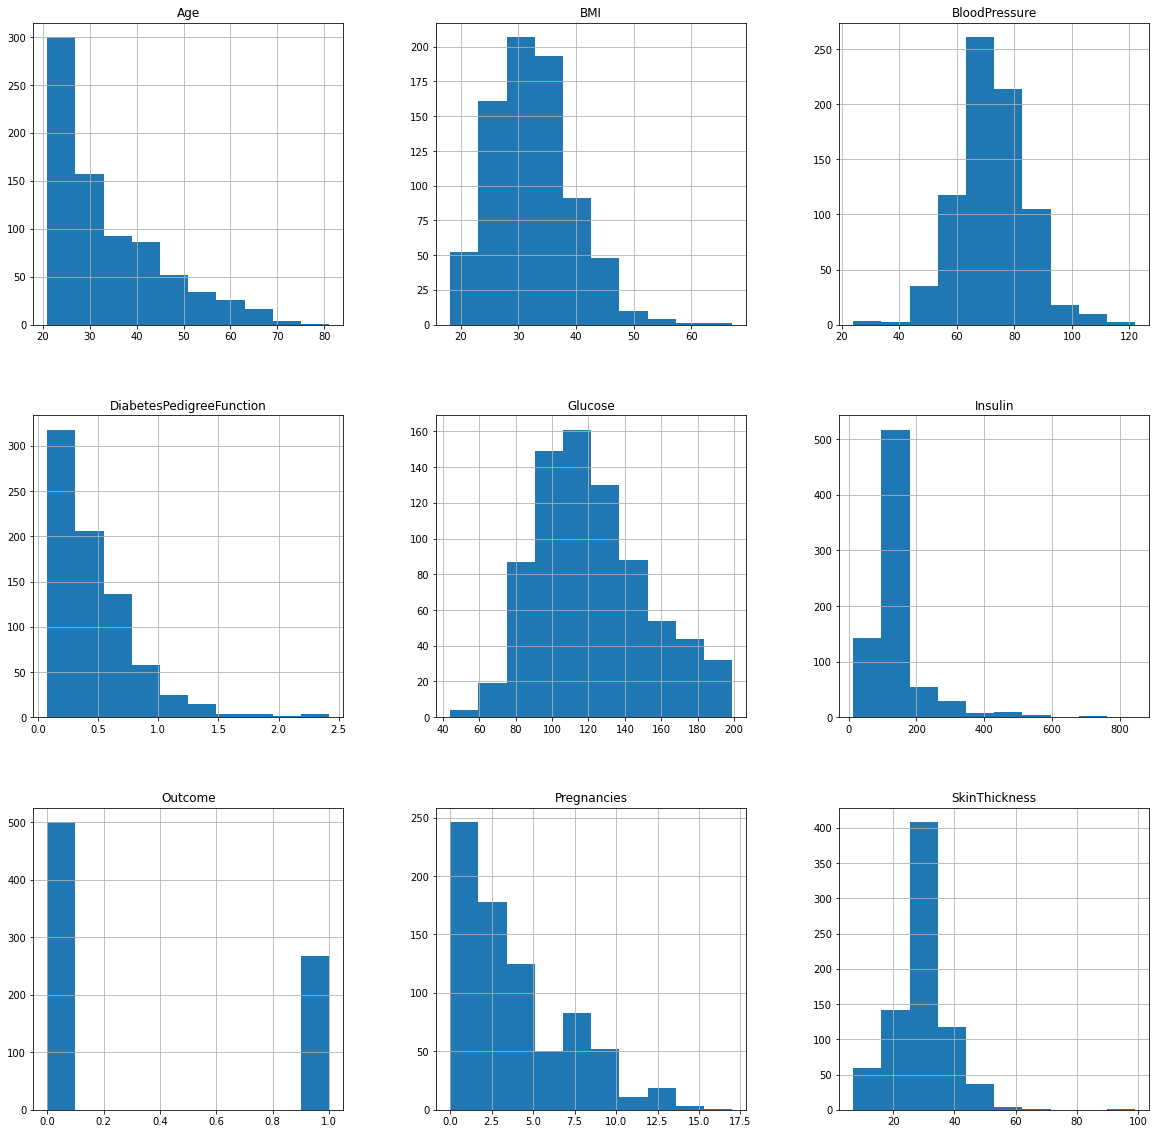

In [ ]:
# df has 0 values
df_copy.hist(figsize=(20,20));

### Count the Labels

The below values shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

In [ ]:
print(df_copy.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


#### Highlights

A total of 768 women were registered in the database. 268 womens about 35% were having diabetes, while 500 women about 65% were not.
The above graph shows that the dataset is biased towards non-diabetic patient. The number of non-diabetics is almost twice the number of diabetic patients.

#### Heatmap For Cleaned Data

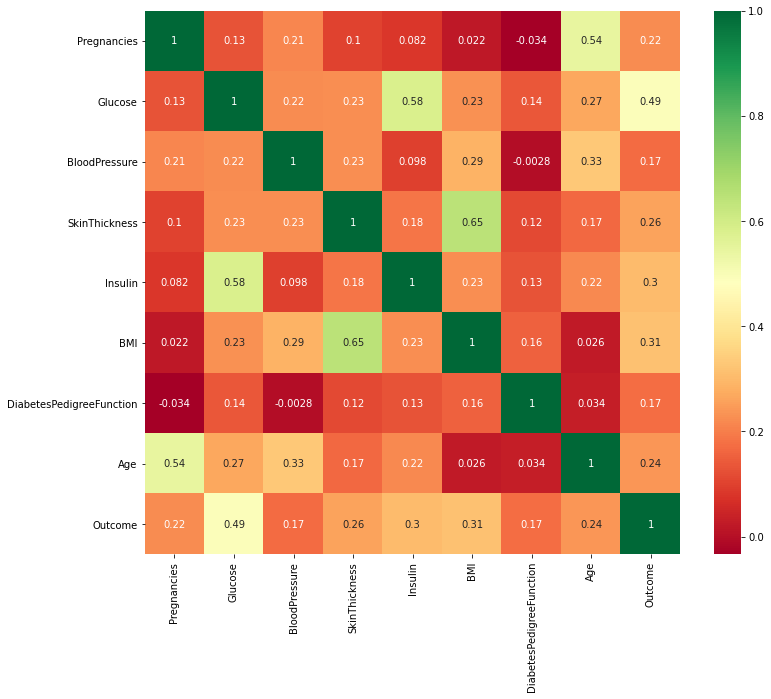

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

##### Highlights

* It seems that Insulin is highly correlated with Glucose (about 0.42), BMI (about 0.18) and Age (about 0.14). It means that as the values of glucose, BMI and Age increase, the insuline is also increasing. It seems logical also that fat and aged people might have high level of insuline in their bodies.
* In the same way SkinThickness is highly correlated with BMI (about 0.54).

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

[![N|Solid](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

### BMI vs. Pregnancy vs Diabetes

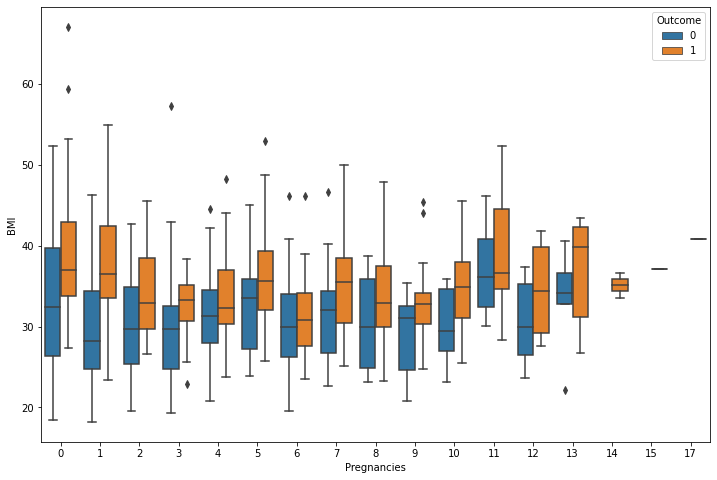

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pregnancies', y='BMI',data=df_copy, hue='Outcome');

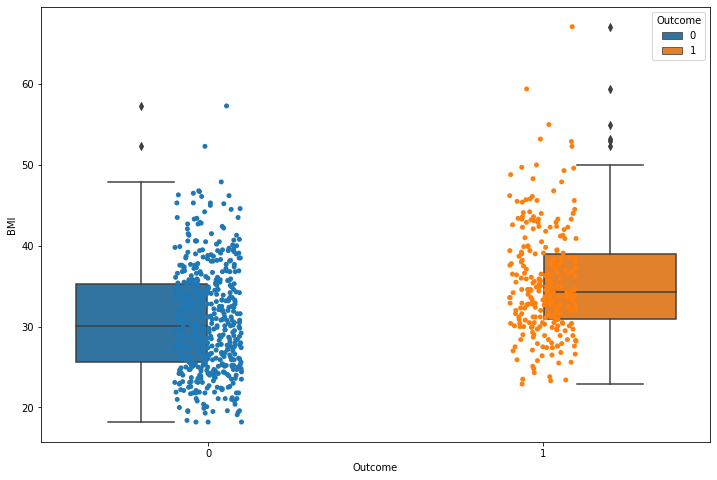

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Outcome', y='BMI',data=df_copy, hue='Outcome')
ax = sns.stripplot(x="Outcome", y="BMI", data=df_copy, jitter=True, edgecolor="gray")

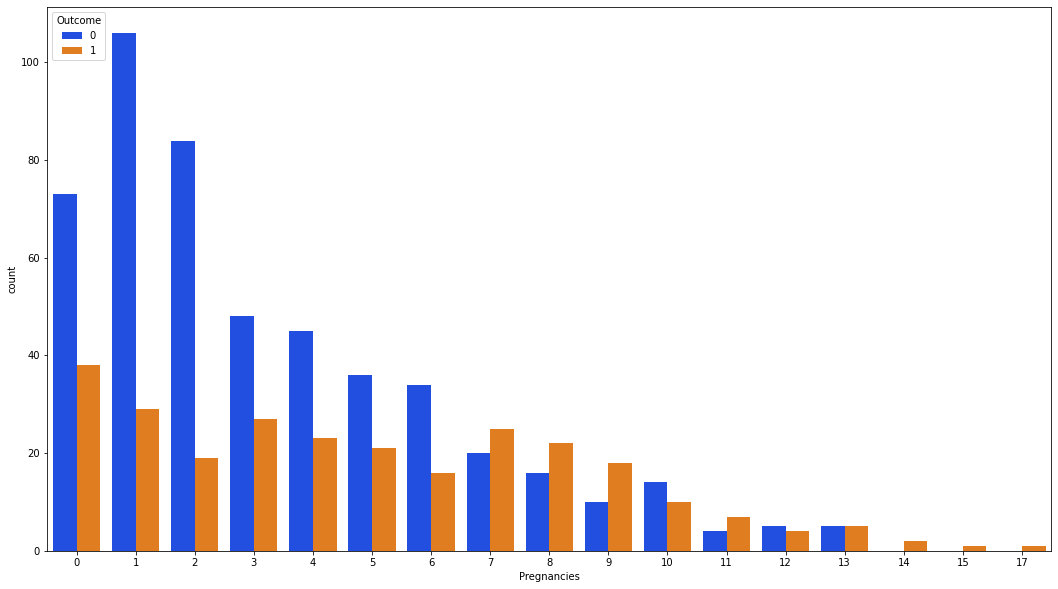

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=df_copy,hue = 'Outcome', palette='bright');

### Highlights

It is surprising that the median BMI does not immensely change as the number of pregnancies increases. I expected there to be a strong positive relationship between the number of pregnancies and the BMI. Those who tested positive for diabetes had higher BMIs than those who does not; yet, not a larger difference between the medians.

BMI will generally be higher for women who have had more numbers of pregnancy as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes

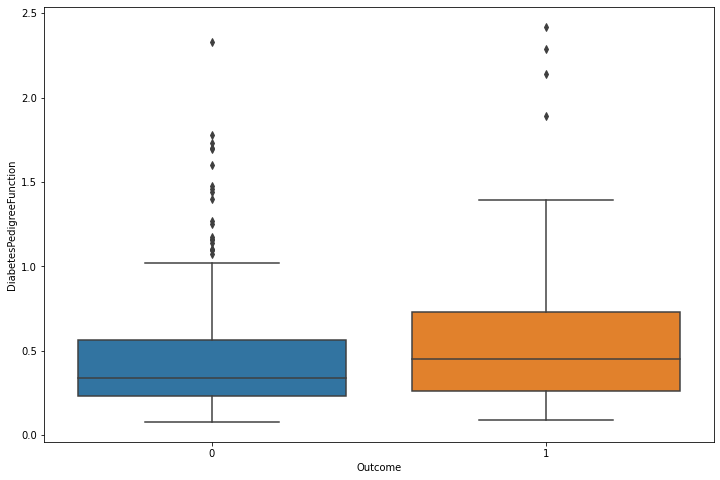

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=df_copy)

### Highlights

This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive. This concluded that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs. Diabetes

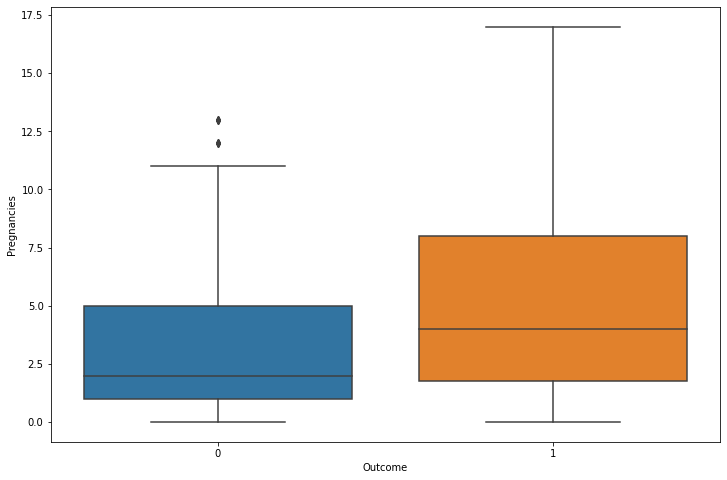

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=df_copy)

### Highlights

The average number of pregnancies is higher (4.9) in diabetic in comparing to (2.3) in non-diabetic women with a significant difference between them.

## BMI vs Diabetes

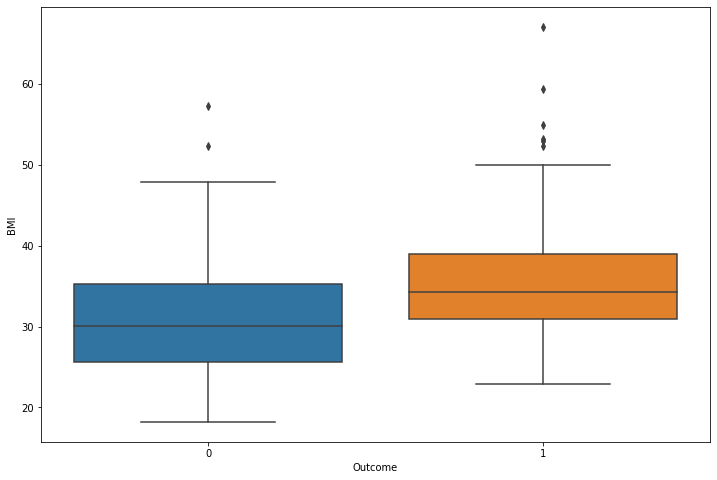

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=df_copy)

## Diabetic in Normal BMI

Let try to find out how is the probabiliy of having diabetic in a women having normal BMI. Please note that the range of normal BMI is 18.5 to 25.

In [ ]:
normalBMIData = df_copy[(df_copy['BMI'] >= 18.5) & (df_copy['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [ ]:
notNormalBMIData = df_copy[(df_copy['BMI'] < 18.5) | (df_copy['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    390
1    259
Name: Outcome, dtype: int64

## Age vs Diabetes

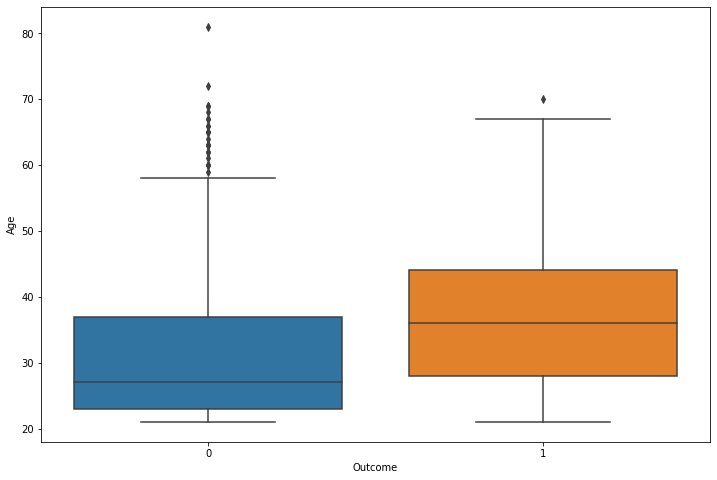

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=df_copy)

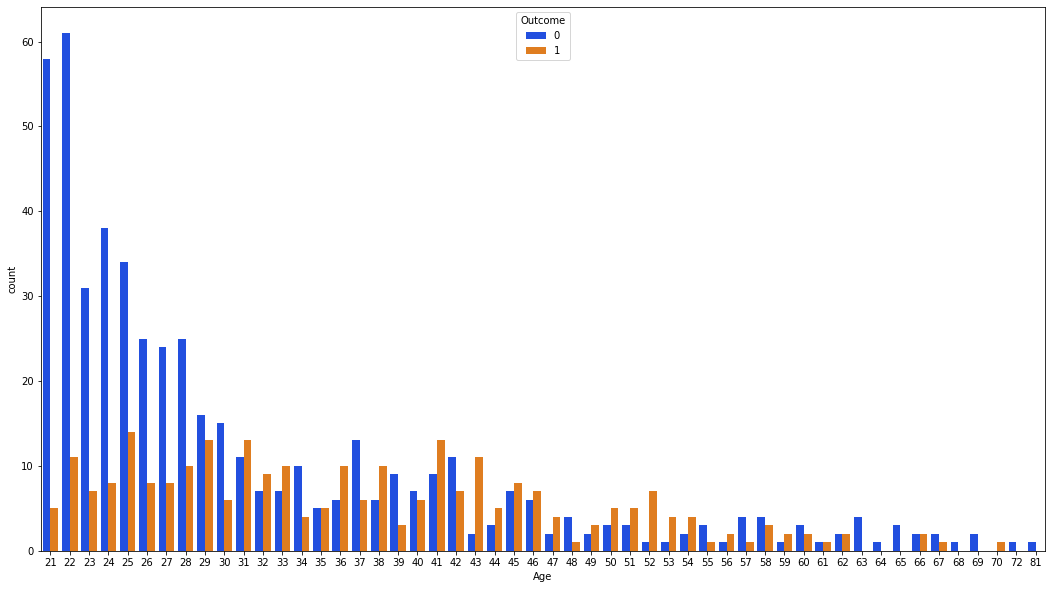

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=df_copy,hue = 'Outcome', palette='bright')

### Highlights

Significant relation can be seen between the age distribution and diabetic occurrence. Women at age group > 31 years were at higher risk to contract diabetes in comparison to the younger age group.

# Prediction



[![Scikit-learn Algorithm Cheat-Sheet](https://scikit-learn.org/stable/_static/ml_map.png)](https://scikit-learn.org/stable/tutorial/machine_learning_map/)

## When Should You Use Normalization And Standardization:
**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data_x=scaler.fit_transform(df_copy.drop(['Outcome'], axis=1))

In [ ]:
df_feat = pd.DataFrame(data_x, columns=df.columns[:-1])

In [ ]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
data_y = pd.DataFrame(df_copy.Outcome.values)

In [ ]:
data_y.head()

,0
0,1
1,0
2,1
3,0
4,1


In [ ]:
#data_y=data_y.reshape((-1,1))

AttributeError: ignored

In [ ]:
data_y.shape

(768, 1)

In [ ]:
data_y.ndim

2

# Model Performance Analysis

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
def fit(model, cv):
    return cross_val_score(model, data_x, data_y, cv=cv).mean()

## Logistic Regression

Remember that we use paramter C as our regularization parameter. 
Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

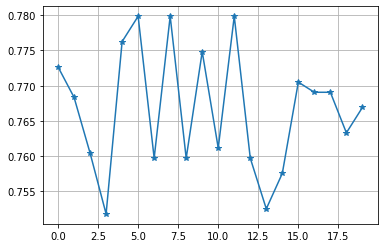

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.18)
acc = []

for i in range(1,21):
    log_clf = LogisticRegression(C=i)
    acc.append(fit(log_clf, cv))
plt.grid(True)
plt.plot(acc, marker='*')

## Random Forest Classifier

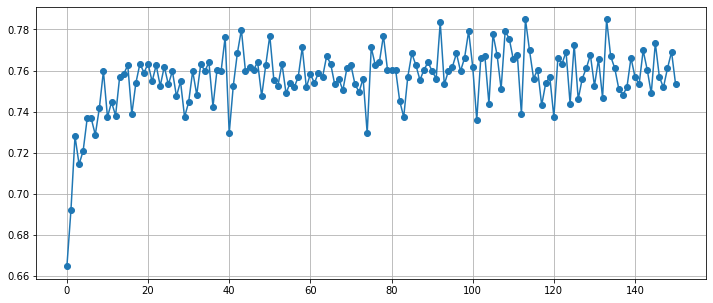

In [ ]:
cv =   ShuffleSplit(n_splits=10, test_size=0.18)

acc = []
rf_values = {}

for i in range(1,152):
    rfc_clf = RandomForestClassifier(n_estimators=i)
    accuracy = fit(rfc_clf, cv)
    acc.append(accuracy)
    rf_values[i] = accuracy

plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc, marker='o')

In [ ]:
sorted(rf_values.items(), key=lambda x: x[1], reverse=True)[:6]

[(114, 0.7848920863309353),
 (134, 0.7848920863309352),
 (93, 0.783453237410072),
 (44, 0.7798561151079136),
 (100, 0.779136690647482),
 (109, 0.779136690647482)]

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

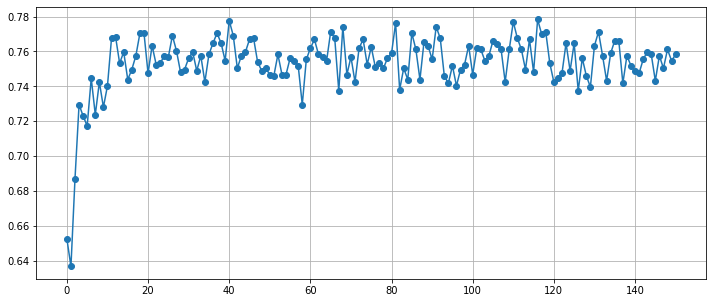

In [ ]:
cv =   ShuffleSplit(n_splits=10, test_size=0.18)

acc = []
gb_values = {}

for i in range(1,152):
    gb_clf = GradientBoostingClassifier(n_estimators=i)
    accuracy = fit(gb_clf, cv)
    acc.append(accuracy)
    gb_values[i] = accuracy

plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc, marker='o')

## Train - Test Split

To split the data into a training set and testing set.

In [ ]:
y = df_copy['Outcome']
X = df_copy.drop('Outcome', axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42, stratify=y)

## Classification Report 
The classification_report() function displays the precision, recall, f1-score and support for each class.

## Precision 
It is the number of True Positive divided by the number of positive results predicted by the classifier.

Precision = TP / TP+FP

## Recall/ Sensitivity 
It is the number of True Positives divided by the number of all relevant samples (all samples that should have been identified as positive).

Recall = TP / TP + FN

* To minimising False Negatives, we would want our Recall to be as close to 100%
* To minimising False Positives, we would want our Precision to be as close to 100%

## F1 Score 
F1 Score is the Harmonic Mean between precision and recall.

It tells how precise the classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

The greater the F1 Score, the better is the performance of our model.
Range [0, 1].

# Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=114)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("AUC Score:", roc_auc_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("F1 Score:", f1_score(y_test, y_pred))

feature_importances = pd.DataFrame(rand_clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

[[127  23]
 [ 36  45]]
Accuracy: 0.7445887445887446
AUC Score: 0.7011111111111111
Precision: 0.6617647058823529
Recall: 0.5555555555555556
F1 Score: 0.6040268456375839


,importance
Glucose,0.249572
BMI,0.161741
Age,0.127202
DiabetesPedigreeFunction,0.124614
Insulin,0.095176
Pregnancies,0.087681
BloodPressure,0.078306
SkinThickness,0.075708


# Publish and deploy the model

In this section you will learn how to store the model in the Watson Machine Learning repository by using the repository client.

First install the client library.

In [ ]:
!rm -rf $PIP_BUILD/watson-machine-learning-client
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 542kB 3.5MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 829kB 11.2MB/s 
     |████████████████████████████████| 143kB 21.0MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72555 sha256=82593ce0cad6730fcb3826d44cfdb0fd3107545b51be43c8907f6357a4509774
  Stored in directory: /root/.cache/pip/wheels/a7/10/5b/5d6543382dc5cc86022e490619c8db1253c22d50a57493262b
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=500999 sha256=653538e6854b7f44bcab1511ac6b30ee9e8b75a4ef502d0bb4b2b87517bdcc45
  Stored in directory: /root/.cache/pip/wheels/4d/69/e0/048f98aadb8f018f13fde51c52af878763eed47d2ee0fb735d
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.7.0-py2.py3-none-any.whl size=88603 sha256=114cbe6d93c732e5e3d1f3afe884ca8e2c702731a81b9cc463d395b1524b3909
  Stored in directory: /root/.cache/pip/

## Enter your Watson Machine Learning service instance credentials here

They can be found in the Service Credentials tab of the Watson Machine Learning service instance that you created on IBM Cloud.

In [ ]:
wml_credentials={
  "url": "https://xxx.ibm.com",
  "username": "xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx",
  "password": "xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx",
  "instance_id": "xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx"
}

## Publish the model to the repository using the client

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

client = WatsonMachineLearningAPIClient(wml_credentials)

model_props = {
    client.repository.ModelMetaNames.NAME: "diabetes-prediction-1",
}

stored_model_details = client.repository.store_model(model, meta_props=model_props, training_data=train_data, pipeline=pipeline)

model_uid            = client.repository.get_model_uid( stored_model_details )
print( "model_uid: ", model_uid )

## Deploy the model as a web service

In [ ]:
deployment_details = client.deployments.create(model_uid, 'diabetes-prediction-1 deployment')

scoring_endpoint = client.deployments.get_scoring_url(deployment_details)
print(scoring_endpoint)

## Call the web service to make a prediction from some sample data

In [ ]:
scoring_payload = {
    "fields": ["hdl", "systolic"],
    "values": [[45.0, 156.6]]
}

score = client.deployments.score(scoring_endpoint, scoring_payload)

print(str(score))